## Image Classification with Cifar-10 Dataset
![](https://production-media.paperswithcode.com/datasets/CIFAR-100-0000000433-b71f61c0_hPEzMRg.jpg)

In [98]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [99]:
# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [100]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Terdapat 50000 data latih dan 10000 data tes dengan ukuran gambar 32 x 32

In [101]:
# Normalisasi data gambar
# One Hot Encoding pada data labels
# Konversi ke tf tensor
num_classes = 10 # Data cifar-100 memiliki 100 label
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [102]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

Rekonstruksi data latih dan data tes agar memenuhi syarat data tes menggunakan 20% dari keseluruhan data

In [103]:
# Gabungkan data latih dan data tes
all_data = np.concatenate((train_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)
# Pisahkan kembali menggunakan train test split
train_images, test_images, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

In [104]:
# Cek jumlah data
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((48000, 32, 32, 3), (48000, 10), (12000, 32, 32, 3), (12000, 10))

Data sudah dibagi dengan benar, 80% data latih, 20% data tes

In [105]:
# Konversi ke bentuk tf data
train_images = tf.constant(train_images)
train_labels = tf.constant(train_labels)
test_images = tf.constant(test_images)
test_labels = tf.constant(test_labels)

In [106]:
# Definisikan model
# Menggunakan model sekuensial
model = models.Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(128, 3, activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [107]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_36 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_37 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [108]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
# Membuat Callback
# ModelCheckpoint untuk menyimpan model terbaik
# EarlyStopping untuk menghentikan training ketika performa model sudah tidak meningkat
# accuracy_callback untuk menghentikan training ketika performa model sudah mencapai target (val_accucary > 92%)
class valTarget(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.92:
            print(f"\nReached {0.92*100}% validation accuracy. Stopping training.")
            self.model.stop_training = True

checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
accuracy_callback = valTarget()

In [110]:
# Train the model
history = model.fit(train_images, train_labels, epochs=100,
                    validation_split=0.2,
                    callbacks=[checkpoint, early_stopping, accuracy_callback])

Epoch 1/100
1200/1200 [==============================] - 16s 10ms/step - loss: 1.8720 - accuracy: 0.3231 - val_loss: 1.6926 - val_accuracy: 0.3907
Epoch 2/100
   6/1200 [..............................] - ETA: 12s - loss: 1.5258 - accuracy: 0.4844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1200/1200 [==============================] - 12s 10ms/step - loss: 1.4876 - accuracy: 0.4596 - val_loss: 1.5301 - val_accuracy: 0.4994
Epoch 3/100
1200/1200 [==============================] - 12s 10ms/step - loss: 1.2970 - accuracy: 0.5416 - val_loss: 1.9473 - val_accuracy: 0.4663
Epoch 4/100
1200/1200 [==============================] - 12s 10ms/step - loss: 1.1727 - accuracy: 0.5906 - val_loss: 1.0993 - val_accuracy: 0.6245
Epoch 5/100
1200/1200 [==============================] - 12s 10ms/step - loss: 1.0868 - accuracy: 0.6253 - val_loss: 0.8554 - val_accuracy: 0.6971
Epoch 6/100
1200/1200 [==============================] - 11s 10ms/step - loss: 1.0157 - accuracy: 0.6495 - val_loss: 1.0897 - val_accuracy: 0.6235
Epoch 7/100
1200/1200 [==============================] - 12s 10ms/step - loss: 0.9565 - accuracy: 0.6706 - val_loss: 0.8223 - val_accuracy: 0.7152
Epoch 8/100
1200/1200 [==============================] - 11s 10ms/step - loss: 0.9052 - accuracy: 0.6895 - val_loss: 0.7018 - val_

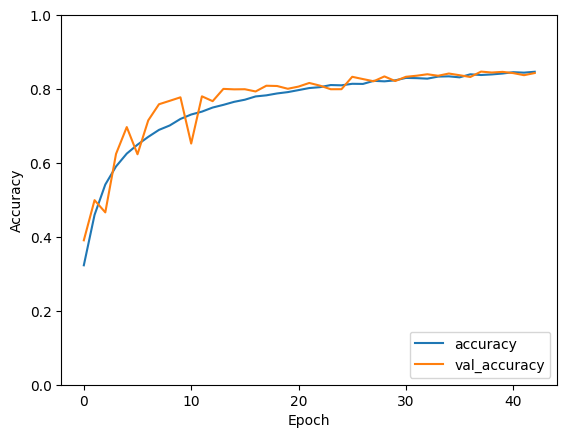

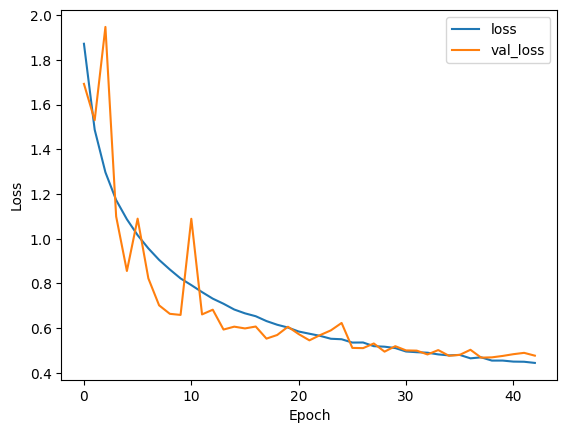

In [114]:
# Plot history pelatihan
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [115]:
# Tes load model yang disimpan dan gunakan untuk melakukan evaluasi pada data tes
model = tf.keras.models.load_model('model.h5')
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

375/375 [==============================] - 2s 4ms/step - loss: 0.4773 - accuracy: 0.8444
Test accuracy: 0.8444166779518127


In [116]:
# Simpan model dalam format tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)